In [54]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from pyvis.network import Network

In [331]:
products =pd.DataFrame(pd.read_csv('products.csv'))
products =products[(products['salesrank'] <= 200000)]
cops=pd.DataFrame(pd.read_csv('copurchase.csv'))
cops=cops[cops.Source.isin(products.id) & cops.Target.isin(products.id)]

In [378]:
# create dfs for categories
books=products[(products['group']=='Book')]
books_cops=cops[cops.Source.isin(books.id) & cops.Target.isin(books.id)]

music=products[(products['group']=='Music')]
music_cops=cops[cops.Source.isin(music.id) & cops.Target.isin(music.id)]

dvds=products[(products['group']=='DVD')]
dvds_cops=cops[cops.Source.isin(dvds.id) & cops.Target.isin(dvds.id)]

videos=products[(products['group']=='Video')]
videos_cops=cops[cops.Source.isin(videos.id) & cops.Target.isin(videos.id)]

books_music_cops=cops[cops.Source.isin(pd.concat([books.id, music.id])) & cops.Target.isin(pd.concat([books.id, music.id]))]
books_dvds_cops=cops[cops.Source.isin(pd.concat([books.id, dvds.id])) & cops.Target.isin(pd.concat([books.id, dvds.id]))]
books_videos_cops=cops[cops.Source.isin(pd.concat([books.id, videos.id])) & cops.Target.isin(pd.concat([books.id, videos.id]))]
music_dvds_cops=cops[cops.Source.isin(pd.concat([dvds.id, music.id])) & cops.Target.isin(pd.concat([dvds.id, music.id]))]
music_videos_cops=cops[cops.Source.isin(pd.concat([videos.id, music.id])) & cops.Target.isin(pd.concat([videos.id, music.id]))]
dvds_videos_cops=cops[cops.Source.isin(pd.concat([videos.id, dvds.id])) & cops.Target.isin(pd.concat([videos.id, dvds.id]))]

print("num books:", len(books.index))
print("num music:", len(music.index))
print("num dvds:", len(dvds.index))
print("num videos:", len(videos.index))

num books: 46069
num music: 34398
num dvds: 9554
num videos: 12597


In [379]:
g_dvds = nx.from_pandas_edgelist(dvds_cops, 'Source', 'Target')
g_videos = nx.from_pandas_edgelist(videos_cops, 'Source', 'Target')
g_music = nx.from_pandas_edgelist(music_cops, 'Source', 'Target')
g_books = nx.from_pandas_edgelist(books_cops, 'Source', 'Target')

In [380]:
g_books_music = nx.from_pandas_edgelist(books_music_cops, 'Source', 'Target')
g_books_dvds = nx.from_pandas_edgelist(books_dvds_cops, 'Source', 'Target')
g_books_videos = nx.from_pandas_edgelist(books_videos_cops, 'Source', 'Target')
g_music_dvds = nx.from_pandas_edgelist(music_dvds_cops, 'Source', 'Target')
g_music_videos = nx.from_pandas_edgelist(music_videos_cops, 'Source', 'Target')
g_dvds_videos = nx.from_pandas_edgelist(dvds_videos_cops, 'Source', 'Target')

In [387]:
def get_degree(g):
    nodes = [node for (node, val) in g.degree()]
    degrees = [val for (node, val) in g.degree()]
    d = np.array(degrees)

    print("no. nodes:", len(d))
    print("min degree:", min(d), ",node id: ", nodes[np.argmin(d)]) # prob more than 1
    print("max degree:", max(d), ",node id: ", nodes[np.argmax(d)])
    print("mean degree:", np.mean(d))
    print("median degree:", np.median(d))
    
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.set_yscale('log')
    ax.hist(d, weights=np.ones(len(d)) / len(d))
    
    return [(node, val) for (node, val) in g.degree()]

no. nodes: 10245
min degree: 1 ,node id:  44
max degree: 17 ,node id:  12615
mean degree: 1.4748657881893608
median degree: 1.0
no. edges: 10754
(12615, 17)
(9121, 12)
(14439, 12)
(40546, 11)
(53516, 11)
(9253, 9)
(10745, 9)
(10517, 9)
(31034, 9)
(56930, 9)


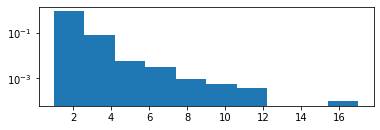

In [433]:
nodes = get_degree(g_dvds_videos) 
print("no. edges:", len(dvds_videos_cops.index))
nodes.sort(key=lambda x: -x[1])
top_deg = []
for node in nodes[:10]:
    print(node)
    top_deg.append(node[0])

no. nodes: 2980
min degree: 1 ,node id:  44
max degree: 8 ,node id:  12615
mean degree: 1.376510067114094
median degree: 1.0
no. edges: 3043
(12615, 8)
(261584, 8)
(14439, 7)
(176, 6)
(9253, 6)
(114187, 6)
(261582, 6)
(10443, 5)
(11427, 5)
(10080, 5)
nodes that have high degree when combined groups
(12615, 8)
(14439, 7)
(9253, 6)
(9121, 5)
(31034, 1)


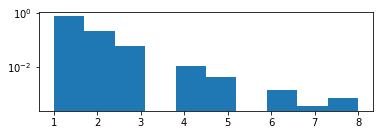

In [436]:
nodes = get_degree(g_dvds)
print("no. edges:", len(dvds_cops.index))
nodes.sort(key=lambda x: -x[1])
for node in nodes[:10]:
    print(node)
    
print("nodes that have high degree when combined groups")
for node in nodes:
    if node[0] in top_deg:
        print(node)

no. nodes: 3811
min degree: 1 ,node id:  410
max degree: 10 ,node id:  40546
mean degree: 1.2547887693518762
median degree: 1.0
no. edges: 3372
(40546, 10)
(10745, 8)
(53516, 7)
(3464, 6)
(43543, 6)
(63390, 6)
(56930, 6)
(61658, 6)
(10517, 6)
(70448, 6)
nodes that have high degree when combined groups
(40546, 10)
(10745, 8)
(53516, 7)
(56930, 6)
(10517, 6)


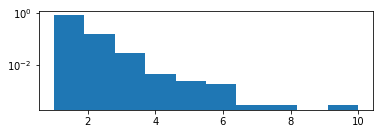

In [437]:
nodes = get_degree(g_videos)
print("no. edges:", len(videos_cops.index)) 
nodes.sort(key=lambda x: -x[1])
for node in nodes[:10]:
    print(node)
    
print("nodes that have high degree when combined groups")
for node in nodes:
    if node[0] in top_deg:
        print(node)

In [413]:
10754 - 3372 - 3043

4339

In [438]:
nx.number_connected_components(g_dvds)

1184

In [440]:
c = nx.connected_components(g_dvds)
components = []
sizes = []
for i in c:
    components.append(i)
    sizes.append(len(i))
print("mean size:", np.mean(sizes))
print("median size:", np.median(sizes))
print("max size:", np.max(sizes))

mean size: 2.516891891891892
median size: 2.0
max size: 14


In [306]:
components.sort(key=lambda x:-len(x))
print("10 largest components within dvds category")
for i in range(10):
    print(components[i])
    
for i in range(10):
    print("Component", i+1)
    p = products[products['id'].isin(list(components[i]))]
    print("salesrank avg:", p["salesrank"].mean())
    display(p[["id", "title", "salesrank", "review_cnt"]])
    
    

10 largest components within dvds category
{10080, 12609, 12610, 151269, 170758, 199082, 199083, 234557, 35252, 151193, 240155, 14397, 234558, 234559}
{236160, 236161, 12615, 244775, 12617, 12618, 132745, 166608, 166609, 156661, 81590, 166522, 15740, 229533}
{261605, 261606, 261582, 261583, 261584, 261587, 261588, 261590, 261593, 261594, 261595, 261598, 261599}
{14436, 14439, 14444, 16652, 39536, 16795, 102811, 62107, 23452, 112733}
{12064, 176, 92369, 33170, 5205, 12438, 255992, 10971, 163837}
{9253, 9254, 70822, 9256, 12628, 193142, 89500, 32989}
{182209, 114187, 143564, 114189, 114190, 114191, 240249, 243611}
{261664, 13592, 29935, 119540, 76822, 152, 1278}
{64192, 7591, 80743, 96592, 52053, 60886, 6459}
{45035, 82797, 123122, 48094, 63513, 87449, 106110}
Component 1
salesrank avg: 26991.571428571428


,id,title,salesrank,review_cnt
9985,10080,Regeneration,10666.0,6
12490,12609,Hollywood Musicals - Second Chorus / Mr. Imperium,46516.0,0
12491,12610,Lost Worlds - Life in the Balance (Large Format),23260.0,4
14257,14397,8 Heads in a Duffel Bag,23316.0,22
34852,35252,Someone Like You/Where the Heart Is,47761.0,0
149552,151193,Man's Best Friend,59672.0,0
149626,151269,"Transformers Season Two Boxed Set, Part 1",3681.0,53
168927,170758,Basket Case (20th Anniversary Special Edition),17086.0,40
196914,199082,Amazons and Gladiators,42154.0,11
196915,199083,The Ride,38089.0,6


Component 2
salesrank avg: 33151.71428571428


,id,title,salesrank,review_cnt
12496,12615,My Louisiana Sky,23233.0,5
12498,12617,Burial Ground - Night of Terror,25845.0,51
12499,12618,Red Shoe Diaries - Forbidden Zone,42804.0,1
15591,15740,Jeff Barry & Friends - Chapel of Love,34823.0,5
80732,81590,Frank Herbert's Dune (TV Miniseries),32035.0,478
131294,132745,Dr. Blood's Coffin,54320.0,1
154976,156661,Shakespeare in Love,13655.0,472
164732,166522,NieA Under 7 - Funky Water Blues (Vol. 2),46483.0,6
164818,166608,Kronos Quartet - Kronos on Stage (Black Angels...,34035.0,2
164819,166609,Man of the Century,26761.0,21


Component 3
salesrank avg: 20360.53846153846


,id,title,salesrank,review_cnt
258644,261582,"Hidden Hollywood, Vol. 2 - More Treasures from...",21717.0,1
258645,261583,"Hollywood Screen Tests, Take 2",34290.0,3
258646,261584,"Hollywood Screen Tests, Take 1",26598.0,3
258649,261587,Cannibal Apocalypse,4025.0,12
258650,261588,Flash Gordon - The Deadly Ray from Mars,38603.0,12
258652,261590,Hidden Hollywood - Treasures from the 20th Cen...,21620.0,3
258655,261593,Oz - The Complete First Season,1046.0,95
258656,261594,Momentum (Large Format),53217.0,0
258657,261595,Dance 'til Dawn,20309.0,9
258660,261598,Lonesome Dove,237.0,192


Component 4
salesrank avg: 27846.5


,id,title,salesrank,review_cnt
14295,14436,The Lost Voyage,25897.0,13
14298,14439,Sherlock Hound - Case File 5,47378.0,0
14303,14444,Johnson County War,5261.0,13
16490,16652,Total Recall 2070,19737.0,19
16631,16795,Cyberotica,51937.0,3
23228,23452,Pokemon - The Johto Journeys - Azalea Adventur...,39659.0,4
39084,39536,Fool's Gold - The Story of the Brink's-Mat Rob...,17991.0,1
61439,62107,Hero,9433.0,13
101684,102811,Goodbye Lover,15138.0,17
111507,112733,Angel Links - Eternal Angel (Vol. 4),46034.0,2


Component 5
salesrank avg: 19981.11111111111


,id,title,salesrank,review_cnt
175,176,"Avengers '67 - Set 1, Vols. 1 & 2",15428.0,15
5152,5205,Erotic Ghost Story,26617.0,5
10871,10971,Plenty,19869.0,17
11954,12064,Fred Hammond & Radical For Christ - Live,21051.0,1
12322,12438,All Night Movies - Movie Set,56298.0,1
32788,33170,The Circuit,17432.0,3
91397,92369,Brideshead Revisited,5333.0,49
162069,163837,Nine Queens,7644.0,38
253114,255992,Chinatown,10158.0,154


Component 6
salesrank avg: 35784.875


,id,title,salesrank,review_cnt
9165,9253,"The Honeymooners - The Lost Episodes, Vol. 20",53032.0,18
9166,9254,"The Honeymooners - The Lost Episodes, Vol. 21",51668.0,18
9167,9256,Kelly Clarkson - Before Your Love/A Moment Lik...,36242.0,15
12509,12628,She Wore a Yellow Ribbon,2592.0,47
32609,32989,Basics 1-2-3: The Basics & Fundamentals for th...,9335.0,2
70070,70822,Air America,38071.0,16
88556,89500,Yu Yu Hakusho Ghostfiles - The Beasts of Maze ...,40265.0,3
191047,193142,Boundaries,55074.0,1


Component 7
salesrank avg: 29565.0


,id,title,salesrank,review_cnt
112954,114187,Autumn Marathon,47524.0,5
112956,114189,Giuseppe Sinopoli - Dreampaths of Music - From...,50071.0,1
112957,114190,The Eagle,24876.0,11
112958,114191,Listen to Britain and Other Films by Humphrey ...,32463.0,0
141996,143564,Jeremiah Johnson,1589.0,82
180253,182209,The Best of The Original Avengers,18846.0,6
237561,240249,A Love Divided,8113.0,7
240884,243611,The Lucy Show - Lucy and the French Movie Star...,53038.0,1


Component 8
salesrank avg: 17562.0


,id,title,salesrank,review_cnt
151,152,"NASA, Pt. 1 & 2",52747.0,0
1266,1278,Back Stage,12630.0,10
13464,13592,Key Largo,1394.0,42
29592,29935,Ozzy Osbourne - Live & Loud,31653.0,29
76011,76822,Death on the Nile,4216.0,47
118240,119540,Irresponsible Captain Tylor - Collection 1,18832.0,1
258725,261664,The Naked Gun DVD Gift Set,1462.0,16


Component 9
salesrank avg: 8887.0


,id,title,salesrank,review_cnt
6390,6459,Barney's Rhyme Time Rhythm,7368.0,10
7518,7591,"Wagner - Der Ring des Nibelungen / Levine, Met...",9026.0,51
51493,52053,Hope Floats,17741.0,98
60242,60886,My Father The Hero,4888.0,37
63501,64192,Tchaikovsky - Maurice Bejart's The Nutcracker ...,19427.0,2
79895,80743,The Flight of the Phoenix,3491.0,52
95556,96592,Gone with the Wind,268.0,562


Component 10
salesrank avg: 30983.571428571428


,id,title,salesrank,review_cnt
44537,45035,Halloween III - Season of the Witch,25253.0,306
47571,48094,The Rose,3240.0,25
62832,63513,Mulholland Drive,1320.0,958
81927,82797,¿Por qué lo llaman amor cuando quieren decir s...,60457.0,2
86530,87449,Volcano - Fountains of Fire,23131.0,3
104954,106110,The Gaucho,39376.0,5
121795,123122,LightWave 3D 7 : Motion Graph Modifiers & Expr...,64108.0,0


In [304]:
print("dvd salesrank avg:", dvds["salesrank"].mean())

dvd salesrank avg: 25025.152501570024


(array([1.056e+03, 7.500e+01, 2.700e+01, 1.200e+01, 7.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ]),
 <BarContainer object of 10 artists>)

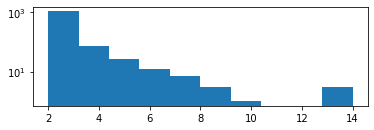

In [217]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')
ax.hist(np.array(sizes))